# DataFrames

## Inspecting a DataFrame

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

* .head() returns the first few rows (the “head” of the DataFrame).
* .info() shows information on each of the columns, such as the data type and number of missing values.
* .describe() calculates a few summary statistics for each column.
* .shape returns the number of rows and columns of the DataFrame.
* .value returns a 2D numpy array with all values in the dataframe
* .columns returns the name of the columns
* .index returns the name/numbers of the rows


homelessness is a DataFrame explore it.
* It contains estimates of homelessness in each U.S. state in 2018. 
* The individual column is the number of homeless individuals not part of a family with children. 
* The family_members column is the number of homeless individuals part of a family with children. 
* The state_pop column is the state's total population.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://drive.google.com/file/d/1Lq26VNpIwF5BzGDLn9c8NGQn9TDe2qkZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
homelessness = pd.read_csv(url2)

In [3]:
homelessness.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [4]:
# Print the head of the homelessness data
print(homelessness.head())

# Print information about homelessness
print(homelessness.info())

# Print the shape of homelessness
print(homelessness.shape)

# Print a description of homelessness
print(homelessness.describe())

   Unnamed: 0              region  ... family_members  state_pop
0           0  East South Central  ...          864.0    4887681
1           1             Pacific  ...          582.0     735139
2           2            Mountain  ...         2606.0    7158024
3           3  West South Central  ...          432.0    3009733
4           4             Pacific  ...        20964.0   39461588

[5 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB
None
(51, 6)
       Unnamed: 0    individuals  family_members   

In [5]:
# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

## Sorting rows


Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

* one column	df.sort_values("breed")
* multiple columns	df.sort_values(["breed", "weight_kg"])

By combining .sort_values() with .head(), you can answer questions in the form, "What are the top cases where…?".

In [6]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

# Print the top few rows
print(homelessness_ind.head())

    Unnamed: 0              region  ... family_members  state_pop
50          50            Mountain  ...          205.0     577601
34          34  West North Central  ...           75.0     758080
7            7      South Atlantic  ...          374.0     965479
39          39         New England  ...          354.0    1058287
45          45         New England  ...          511.0     624358

[5 rows x 6 columns]


In [7]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members",ascending=False)

# Print the top few rows
print(homelessness_fam.head())

    Unnamed: 0              region  ... family_members  state_pop
32          32        Mid-Atlantic  ...        52070.0   19530351
4            4             Pacific  ...        20964.0   39461588
21          21         New England  ...        13257.0    6882635
9            9      South Atlantic  ...         9587.0   21244317
43          43  West South Central  ...         6111.0   28628666

[5 rows x 6 columns]


In [8]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region","family_members"],ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head(5))

    Unnamed: 0              region  ... family_members  state_pop
13          13  East North Central  ...         3891.0   12723071
35          35  East North Central  ...         3320.0   11676341
22          22  East North Central  ...         3142.0    9984072
49          49  East North Central  ...         2167.0    5807406
14          14  East North Central  ...         1482.0    6695497

[5 rows x 6 columns]


## Subsetting columns

When working with data, you may not need all of the variables in your dataset. Square brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. 

To select only "col_a" of the DataFrame df, use
* df["col_a"]

To select "col_a" and "col_b" of df, use
* df[["col_a", "col_b"]]

In [9]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [10]:
# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


## Subsetting rows

A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return True or False for each row, then pass that inside square brackets.

* dogs[dogs["height_cm"] > 60]
* dogs[dogs["color"] == "tan"]

You can filter for multiple conditions at once by using the bitwise and operator, &.

* dogs[(dogs["height_cm"] > 60) & (dogs["color"] == "tan")]

In [11]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"]>10000]

# See the result
print(ind_gt_10k)

    Unnamed: 0              region  ... family_members  state_pop
4            4             Pacific  ...        20964.0   39461588
9            9      South Atlantic  ...         9587.0   21244317
32          32        Mid-Atlantic  ...        52070.0   19530351
37          37             Pacific  ...         3337.0    4181886
43          43  West South Central  ...         6111.0   28628666
47          47             Pacific  ...         5880.0    7523869

[6 rows x 6 columns]


In [12]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"]=="Mountain"]
# See the result
print(mountain_reg)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
5            5  Mountain    Colorado       7607.0          3250.0    5691287
12          12  Mountain       Idaho       1297.0           715.0    1750536
26          26  Mountain     Montana        983.0           422.0    1060665
28          28  Mountain      Nevada       7058.0           486.0    3027341
31          31  Mountain  New Mexico       1949.0           602.0    2092741
44          44  Mountain        Utah       1904.0           972.0    3153550
50          50  Mountain     Wyoming        434.0           205.0     577601


In [13]:
# Filter for rows where family_members is less than 1000 and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"]<1000) &
                             (homelessness["region"]=="Pacific")  ]

# See the result
print(fam_lt_1k_pac)

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


## Subsetting rows by categorical variables

Subsetting data based on a categorical variable often involves using the "or" operator (|) to select rows from multiple categories. 

This can get tedious when you want all states in one of three different regions, for example. Instead, use the .isin() method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

> colors = ["brown", "black", "tan"]

> condition = dogs["color"].isin(colors)

> dogs[condition]


In [14]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[homelessness["region"].isin(["South Atlantic", "Mid-Atlantic"])]

# See the result
print(south_mid_atlantic)

    Unnamed: 0          region  ... family_members  state_pop
7            7  South Atlantic  ...          374.0     965479
8            8  South Atlantic  ...         3134.0     701547
9            9  South Atlantic  ...         9587.0   21244317
10          10  South Atlantic  ...         2556.0   10511131
20          20  South Atlantic  ...         2230.0    6035802
30          30    Mid-Atlantic  ...         3350.0    8886025
32          32    Mid-Atlantic  ...        52070.0   19530351
33          33  South Atlantic  ...         2817.0   10381615
38          38    Mid-Atlantic  ...         5349.0   12800922
40          40  South Atlantic  ...          851.0    5084156
46          46  South Atlantic  ...         2047.0    8501286
48          48  South Atlantic  ...          222.0    1804291

[12 rows x 6 columns]


In [15]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]
# See the result
print(mojave_homelessness)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


## Adding new columns

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.

In [16]:
# Add total col as sum of individuals and family_members
homelessness["total"]=homelessness["individuals"]+homelessness["family_members"]

# Add p_individuals col as proportion of individuals
homelessness["p_individuals"]=homelessness["individuals"]/homelessness["total"]

# See the result
print(homelessness)

    Unnamed: 0              region  ...     total  p_individuals
0            0  East South Central  ...    3434.0       0.748398
1            1             Pacific  ...    2016.0       0.711310
2            2            Mountain  ...    9865.0       0.735834
3            3  West South Central  ...    2712.0       0.840708
4            4             Pacific  ...  129972.0       0.838704
5            5            Mountain  ...   10857.0       0.700654
6            6         New England  ...    3976.0       0.573441
7            7      South Atlantic  ...    1082.0       0.654344
8            8      South Atlantic  ...    6904.0       0.546060
9            9      South Atlantic  ...   31030.0       0.691041
10          10      South Atlantic  ...    9499.0       0.730919
11          11             Pacific  ...    6530.0       0.632619
12          12            Mountain  ...    2012.0       0.644632
13          13  East North Central  ...   10643.0       0.634408
14          14  East Nort

You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out.

In [17]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"]

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"]>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k",ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state","indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


# Aggregating Data

## Summary Statistics

### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [18]:
url3='https://drive.google.com/file/d/11EYD35OZWKy6cpMoE4FCZtYfiZlKskP0/view?usp=sharing'
url4='https://drive.google.com/uc?id=' + url3.split('/')[-2]
sales = pd.read_csv(url4)

In [19]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0           0      1    A  ...       5.727778             0.679451         8.106
1           1      1    A  ...       8.055556             0.693452         8.106
2           2      1    A  ...      16.816667             0.718284         7.808
3           3      1    A  ...      22.527778             0.748928         7.808
4           4      1    A  ...      27.050000             0.714586         7.808

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales        

### Summarizing dates

Summary statistics can also be calculated on date columns that have values with the data type datetime64. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [20]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26
2010-02-05


### Efficient summaries
While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

* df['column'].agg(function)

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.

In [21]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

16.58333333333334
        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Cumulative statistics
Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

A DataFrame called sales_1_1 has been created for you, which contains the sales data for department 1 of store 1. pandas is loaded as pd.

Sort the rows of sales_1_1 by the date column in ascending order.

Get the cumulative sum of weekly_sales and add it as a new column of sales_1_1 called cum_weekly_sales.

Get the cumulative maximum of weekly_sales, and add it as a column called cum_max_sales.

Print the date, weekly_sales, cum_weekly_sales, and cum_max_sales

In [22]:
# Sort sales_1_1 by date
sales_1_1 =sales.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
6437   2010-02-05      38597.52      6.352202e+04       38597.52
1249   2010-02-05       3840.21      6.736223e+04       38597.52
6449   2010-02-05      17590.59      8.495282e+04       38597.52
6461   2010-02-05       4929.87      8.988269e+04       38597.52
...           ...           ...               ...            ...
3592   2012-10-05        440.00      2.568932e+08      293966.05
8108   2012-10-05        660.00      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05
6257   2012-10-12          3.00      2.568947e+08      293966.05
3384   2012-10-26        -21.63      2.568947e+08      293966.05

[10774 rows x 4 columns]


## Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [23]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store","type"])
print (store_types.head(5))

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store","department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset=["date"])

# Print date col of holiday_dates
print(holiday_dates[["date"]])

      Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0              0      1    A  ...       5.727778             0.679451         8.106
901          901      2    A  ...       4.550000             0.679451         8.324
1798        1798      4    A  ...       6.533333             0.686319         8.623
2699        2699      6    A  ...       4.683333             0.679451         7.259
3593        3593     10    B  ...      12.411111             0.782478         9.765

[5 rows x 10 columns]
    Unnamed: 0  store type  ...  temperature_c fuel_price_usd_per_l  unemployment
0            0      1    A  ...       5.727778             0.679451         8.106
12          12      1    A  ...       5.727778             0.679451         8.106
24          24      1    A  ...       5.727778             0.679451         8.106
36          36      1    A  ...       5.727778             0.679451         8.106
48          48      1    A  ...       5.727778             0.67

### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise

In [24]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
41    12
30    12
23    12
24    12
25    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


## Group By

What percent of sales occurred at each store type?
While .groupby() is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

In [25]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / (sales_A+ sales_B+ sales_C)
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


The .groupby() method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the .groupby() method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not.

In [26]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Multiple grouped summaries
Earlier in this chapter, you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: np.min, np.max, np.mean, and np.median.

In [27]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min,np.max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")["unemployment","fuel_price_usd_per_l"].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)


        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                   ... fuel_price_usd_per_l                    
             amin   amax      mean  ...                 amax      mean    median
type                                ...                                         
A           3.879  8.992  7.972611  ...             1.107410  0.744619  0.735455
B           7.170  9.765  9.279323  ...             1.107674  0.805858  0.803348

[2 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


## Pivoting
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the .pivot_table() method is just an alternative to .groupby().

In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using .groupby().

In [28]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index='type', aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index='type', columns='is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

      weekly_sales
type              
A     23674.667242
B     25696.678370
              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08
is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


### Fill in missing values and sum values with pivot tables
The .pivot_table() method has several useful arguments, including fill_value and margins.

fill_value replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.
margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.
In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!

In [29]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales', index='department',columns='type',fill_value=0))

# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))


type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]
type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          

# Slicing and Indexing

## Indexing

In [30]:
url5='https://drive.google.com/file/d/10BKaFCIGsJidQWKL1DjAl1sS84Nh5K83/view?usp=sharing'
url6='https://drive.google.com/uc?id=' + url5.split('/')[-2]
temperatures= pd.read_csv(url6)


## Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In [31]:
# Look at temperatures
print(temperatures.head())

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind.head())

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
          city  Unnamed: 0        date        country  avg_temp_c
0      Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan   

## Subsetting with .loc[]

The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [32]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets (using .isin method)
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

## Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.


The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.


The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [33]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro'),('Pakistan', 'Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


## Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling .sort_values(). It's also useful to be able to sort by elements in the index. For this, you need to use .sort_index()

In [34]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=['city']))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country','city'],ascending=[True,False]))


                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

## ٍSlicing

### Slicing index values
Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

* You can only slice an index if the index is sorted (using .sort_index()).
* To slice at the outer level, first and last can be strings.
* To slice at inner levels, first and last should be tuples.
* If you pass a single slice to .loc[], it will slice the rows.


In [35]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore") : ("Russia", "Moscow")])


                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

### Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to .loc[], you can subset by rows and columns in one go.

In [36]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"),"date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

In [37]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]
print(temperatures_bool)

# Set date as an index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(print(temperatures_ind.loc["2010-8":"2011-2"]))


       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

### Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.

In [38]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])


2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]
      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


## ًWorking with Pivots

### Pivot temperature by city and year
It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.

You can access the components of a date (year, month and day) using code of the form dataframe["column"].dt.component. For example, the month component is dataframe["column"].dt.month, and the year component is dataframe["column"].dt.year.

Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.

In [39]:
pd.DatetimeIndex(temperatures["date"]).month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            12,  1,  2,  3,  4,  5,  6,  7,  8,  9],
           dtype='int64', name='date', length=16500)

In [40]:
# Add a year column to temperatures
#temperatures['year']=temperatures['date'].dt.year
temperatures['year']=pd.DatetimeIndex(temperatures["date"]).year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c',index=['country', 'city'],columns='year')

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001  ...       2012       2013
country       city                                    ...                      
Afghanistan   Kabul             15.822667  15.847917  ...  14.510333  16.206125
Angola        Luanda            24.410333  24.427083  ...  24.240083  24.553875
Australia     Melbourne         14.320083  14.180000  ...  14.268667  14.741500
              Sydney            17.567417  17.854500  ...  17.474333  18.089750
Bangladesh    Dhaka             25.905250  25.931250  ...  26.283583  26.587000
...                                   ...        ...  ...        ...        ...
United States Chicago           11.089667  11.703083  ...  12.821250  11.586889
              Los Angeles       16.643333  16.466250  ...  17.089583  18.120667
              New York           9.969083  10.931000  ...  11.971500  12.163889
Vietnam       Ho Chi Minh City  27.588917  27.831750  ...  28.248750  28.455000
Zimbabwe      Harare            20.28366

In [41]:
# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc["Egypt":"India"])

# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi")])

# Subset in both directions from Egypt, Cairo to India, Delhi, and 2005 to 2010.
print(temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi"),"2005":"2010"])

year                       2000       2001  ...       2012       2013
country  city                               ...                      
Egypt    Alexandria   20.744500  21.454583  ...  21.552583  21.438500
         Cairo        21.486167  22.330833  ...  22.484250  22.907000
         Gizeh        21.486167  22.330833  ...  22.484250  22.907000
Ethiopia Addis Abeba  18.241250  18.296417  ...  18.448583  19.539000
France   Paris        11.739667  11.371250  ...  11.219917  11.011625
Germany  Berlin       10.963667   9.690250  ...   9.964333  10.121500
India    Ahmadabad    27.436000  27.198083  ...  27.027250  27.608625
         Bangalore    25.337917  25.528167  ...  26.042333  26.610500
         Bombay       27.203667  27.243667  ...  27.192500  26.713000
         Calcutta     26.491333  26.515167  ...  26.935083  27.369250
         Delhi        26.048333  25.862917  ...  25.889417  26.709250
         Hyderabad    27.231833  27.555167  ...  28.018583  28.851250
         Jaipur     

### Calculating on a pivot table
Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs.

Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: series[series > value].

In [42]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])


year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


# Creating and Visualizing DataFrames

## Visualization

* Read the pickle file in avocados
* Print the head of the avocados dataset. What columns are available?
* For each avocado size group, calculate the total number sold, storing as nb_sold_by_size.
* Create a bar plot of the number of avocados sold by size.
Show the plot.

In [43]:
url7='https://drive.google.com/file/d/11fHau3RsuwnFS09nKPAmW-rnVFfp6QvQ/view?usp=sharing'
url8='https://drive.google.com/uc?id=' + url7.split('/')[-2]
avocados = pd.read_pickle(url8)


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


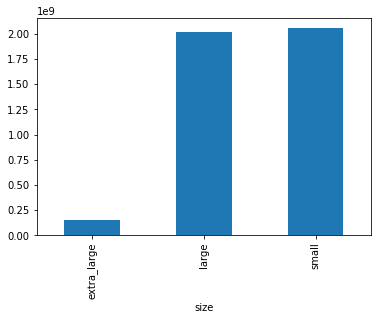

In [44]:
# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

## Line Plot

### Visualizing the changes in sales over time

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

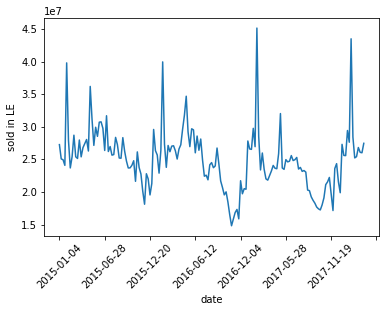

In [45]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(ylabel="sold in LE",kind="line",rot=45)

# Show the plot
plt.show()

## Scatter Plot

Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

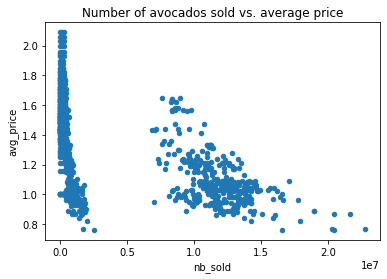

In [46]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold",y="avg_price",kind="scatter",title="Number of avocados sold vs. average price")
# Show the plot
plt.show()

### Creating multiple plots 
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

* Subset avocados for the conventional type, and the average price column. 
* Create a histogram.
* Create a histogram of avg_price for organic type avocados.
* Add a legend to your plot, with the names "conventional" and "organic".
* Show your plot.

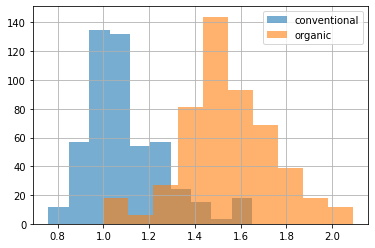

In [47]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=='conventional']["avg_price"].hist(alpha=0.6)

# Histogram of organic avg_price
avocados[avocados["type"]=='organic']["avg_price"].hist(alpha=0.6)

# Add a legend
plt.legend(['conventional','organic'])

# Show the plot
plt.show()

## Missing Data


### Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

In [48]:
avocados_2016=avocados[avocados['year']==2016]
print(avocados_2016)

           date          type  year  avg_price         size      nb_sold
52   2016-12-25  conventional  2016       1.00        small   9255125.20
53   2016-12-18  conventional  2016       0.96        small   9394065.91
54   2016-12-11  conventional  2016       0.98        small   9009996.11
55   2016-12-04  conventional  2016       1.00        small  11043350.90
56   2016-11-27  conventional  2016       1.21        small   7891487.94
..          ...           ...   ...        ...          ...          ...
944  2016-01-31       organic  2016       1.43  extra_large      5515.91
945  2016-01-24       organic  2016       1.41  extra_large     12933.97
946  2016-01-17       organic  2016       1.44  extra_large     13106.29
947  2016-01-10       organic  2016       1.35  extra_large      8771.79
948  2016-01-03       organic  2016       1.43  extra_large      7749.40

[312 rows x 6 columns]


      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


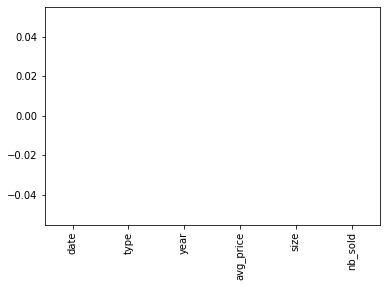

In [49]:
# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()


### Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [50]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### Replacing missing values

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

>> dogs[["height_cm", "weight_kg"]].hist()

In [51]:
'''
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()
'''

'\n# List the columns with missing values\ncols_with_missing = ["small_sold", "large_sold", "xl_sold"]\n\n# Create histograms showing the distributions cols_with_missing\navocados_2016[cols_with_missing].hist()\n\n# Show the plot\nplt.show()\n\n# Fill in missing values with 0\navocados_filled = avocados_2016.fillna(0)\n\n# Create histograms of the filled columns\navocados_filled[cols_with_missing].hist()\n\n# Show the plot\nplt.show()\n'

# Creating DataFrame

In [52]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [53]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
